In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('advertising.csv')
print(df.columns.tolist())
X=df.drop("Sales", axis=1).values
y=df["Sales"].values

['TV', 'Radio', 'Newspaper', 'Sales']


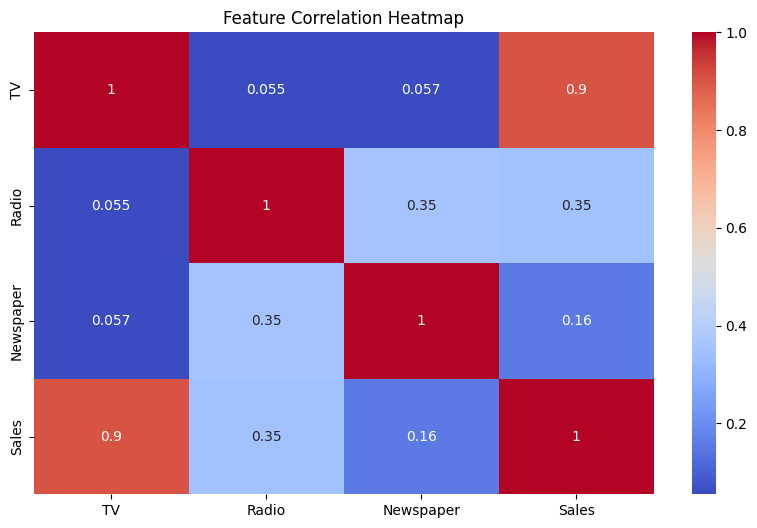

In [3]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',)
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_b =np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test_b = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
print("Shape of X_train_b:", X_train_b.shape)

Shape of X_train_b: (150, 4)


In [5]:
def online_gradient_descent(X, y, w, lr=0.0001):
    for i in range(len(X)):
        y_pred = np.dot(X[i], w)
        error = y_pred - y[i]
        w -= 2*lr * error * X[i]
    return w    

In [6]:
def batch_gradient_descent(X, y, w, lr=0.0001, epochs=1000):
    loss_history = []
    for epoch in range(epochs):
        y_pred = np.dot(X, w)
        error = y_pred - y
        gradient = -2 * np.dot(X.T, error) / len(X)
        w -= lr * gradient
        loss_history.append(np.mean(error ** 2))
    return w, loss_history    

In [7]:
def evaluate_model(X, y, w, name='Model'):
    y_pred = np.dot(X, w)
    avg_abs_error = np.mean(np.abs(y_pred - y))
    print(f"[{name}] Average Absolute Error: {avg_abs_error:.4f}")
    return avg_abs_error

In [8]:
w_online = np.ones(X_train_b.shape[1])
w_online = online_gradient_descent(X_train_b, y_train, w_online)
evaluate_model(X_test_b, y_test, w_online, name='Online Gradient Descent')

[Online Gradient Descent] Average Absolute Error: 12.7334


np.float64(12.733395856149562)

In [9]:
w_batch=np.ones(X_train_b.shape[1])
w_batch, loss_history = batch_gradient_descent(X_train_b, y_train, w_batch)
evaluate_model(X_test_b, y_test, w_batch, name='Batch Gradient Descent')

[Batch Gradient Descent] Average Absolute Error: 16.1275


np.float64(16.12753124946465)

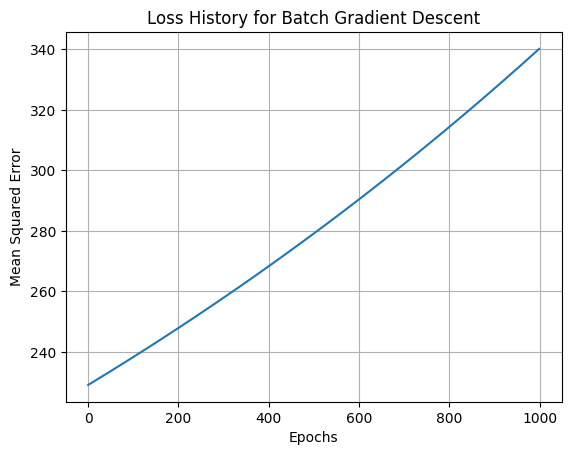

In [10]:
plt.plot(loss_history)
plt.title("Loss History for Batch Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)  # since we've manually added bias as last column
lr.fit(X_train_b, y_train)  # Already includes bias column

y_pred_lr = lr.predict(X_test_b)  # Must also include bias column
mae_sklearn = np.mean(np.abs(y_pred_lr - y_test))

print(f"[Scikit-learn Linear Regression] Average Absolute Error: {mae_sklearn:.4f}")


[Scikit-learn Linear Regression] Average Absolute Error: 1.1200
